In [2]:
from qiskit import QuantumCircuit
import math

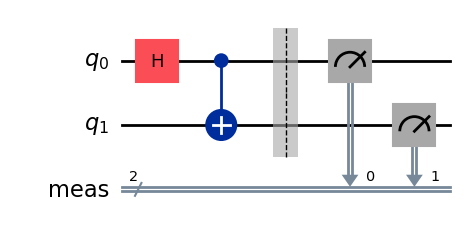

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

qc.draw('mpl')

In [3]:
from qiskit.primitives import Sampler

In [9]:
token= "90c11c3427d32b9170daa73f5fffe26dc68634b8b6f0d8e5a83082726bd42c2d384e16c5ea3f3ed03f5cb71156de8fb4ba9b3880f9f990c6ed2d275f315de5d3"
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum",
  overwrite=True
)

In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
print("Selected backend:", backend)

Selected backend: <IBMBackend('ibm_brisbane')>


In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
bell_meas = QuantumCircuit(2)
bell_meas.h(0)
bell_meas.cx(0,1)
bell_meas.measure_all()

In [13]:
isa_bell_meas = transpile(bell_meas, backend)

pub_bell_meas = (isa_bell_meas,)

In [6]:
from qiskit_ibm_runtime  import SamplerV2

sampler = SamplerV2(backend)
job_bell_meas = sampler.run([pub_bell_meas],shots = 10)

result_bell_meas = job_bell_meas.result()
data_bell_meas = result_bell_meas[0].data
data_bell_meas.meas

AttributeError: 'DataBin' object has no attribute 'meas'

In [17]:
data_bell_meas.meas

BitArray(<shape=(), num_shots=10, num_bits=2>)

In [33]:
op_str = ''  # Initialize an empty output string
num_qbits = 10  # Define number of qubits
str_len = 10
# Calculate the number of chunks needed
num_chunks = math.ceil(str_len / num_qbits)
for _ in range(num_chunks):
    # Create a quantum register and classical register
    q = QuantumRegister(num_qbits)
    c = ClassicalRegister(num_qbits)
    QC = QuantumCircuit(q, c)
    service = QiskitRuntimeService()
    backend = service.least_busy(operational=True, simulator=False)
    print("Selected backend:", backend)
    # Apply Hadamard gates to all qubits to create superposition
    for i in range(num_qbits):
        QC.h(q[i])
    QC.measure(q, c)
    isa_bell_meas = transpile(QC, backend)

    pub_bell_meas = (isa_bell_meas,)
    sampler = SamplerV2(backend)
    sampler.options.update(default_shots=1)
    job_bell_meas = sampler.run([pub_bell_meas],shots = 1)
    print(f"job id: {job_bell_meas.job_id()}")

    result_bell_meas = job_bell_meas.result()
    data_bell_meas = result_bell_meas[0].data
    print(data_bell_meas)

Selected backend: <IBMBackend('ibm_brisbane')>
DataBin(c4=BitArray(<shape=(), num_shots=1, num_bits=10>))


In [31]:
print(data_bell_meas.c3.get_counts())

{'0101101001': 1, '0001101100': 1, '0111101111': 1, '1010100100': 1, '0110111111': 1, '0000111011': 1, '1000000010': 1, '0101101000': 1, '0110110111': 1, '0011111000': 1}


In [34]:
# Dynamically get the first (or any) key in the data_bell_meas dictionary
bitarray = next(iter(data_bell_meas.values()))  # Get the BitArray object
counts = bitarray.get_counts()  # Call get_counts() on the BitArray
print(counts)


{'1011110100': 1}


In [35]:
first_bitstring = next(iter(counts.keys()))  # This will give the first key (bitstring)

In [36]:
first_bitstring

'1011110100'